<a href="https://colab.research.google.com/github/TPYogalashmi/datascience_nexus/blob/main/Task_1_Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IRIS CLASSIFICATION PROBLEM**

The following tasks are completed :   

1.Simple Exploratory Data Analysis (EDA)

2.Data Science Task

3.Documentation (provided in the text box)

CLONING THE GIT REPO :

In [1]:
!git clone https://github.com/TPYogalashmi/datascience_nexus.git

Cloning into 'datascience_nexus'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 28 (delta 8), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (28/28), 190.70 KiB | 4.33 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [2]:
!pwd
%cd /content/datascience_nexus/TASK-1

/content
[Errno 2] No such file or directory: '/content/datascience_nexus/TASK-1'
/content


## **IMPORTING THE NECESSARY LIBRARIES**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score , confusion_matrix, classification_report


# **Importing The Dataset : Iris.csv**

If this doesnt work please use this link https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data and download the csv file an dlink it to the collab  

In [5]:
df=pd.read_csv("/content/datascience_nexus/Iris.csv.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# **1.Exploratory Data Analysis (EDA)**

It involves examining and visualizing the dataset to understand its characteristics, patterns, and relationships among variables. The primary goals of EDA are to gain insights, identify patterns, and inform subsequent steps in the data analysis or machine learning pipeline.

## i) Preprocessing Data

Checking for the null ,if found any try to clean the data accordingly.Removing the duplicates entries in the csv files

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df = df.drop(columns=['Id'])

In [ ]:
df = df.drop_duplicates()

## ii) Descriptive Statistics

Calculating and analyzing about the dataset in terms of no of rows , mean, standard deviation ,etc..






In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info() #checking for  the datatype and null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


## **iii)Exloring the distribution  and  characteristics of each feature in the dataset through visualizaton such as Histograms ,Boxplot..**

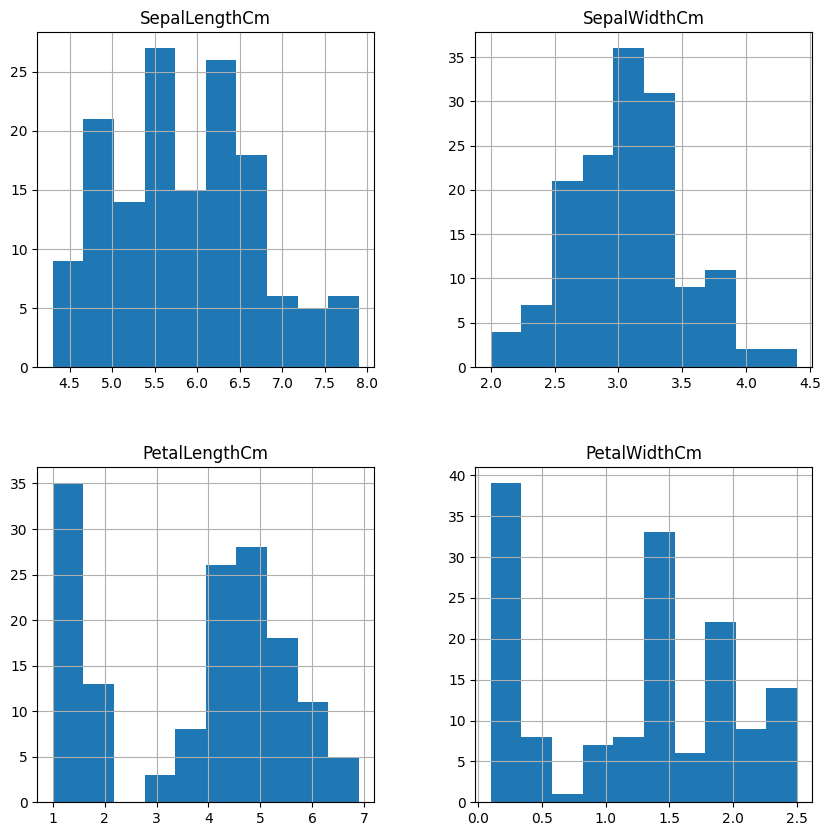

In [ ]:
df.hist(figsize=(10, 10))
plt.show()

A detailed view on histogram of one variable with proper labels

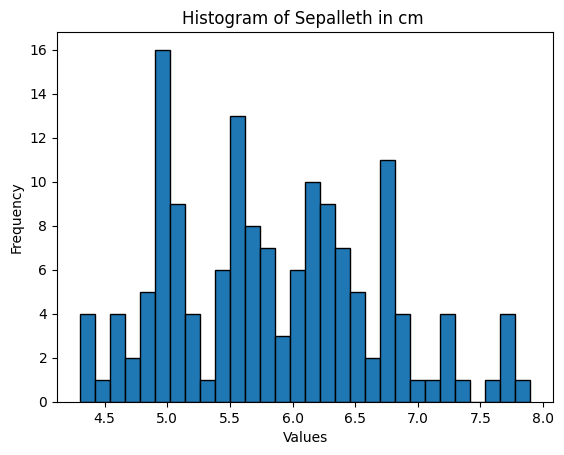

In [ ]:
plt.hist(df['SepalLengthCm'], bins=30, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Sepalleth in cm ')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

### Box plot to examine the characteristics of individual variables

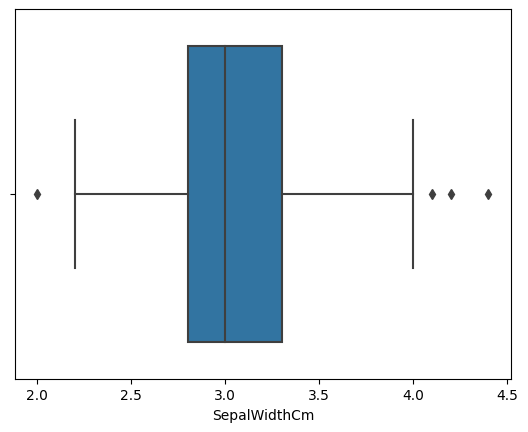

In [ ]:
sns.boxplot(x='SepalWidthCm', data=df)
plt.show()

## **iv) Highlighting the relationship between variables**

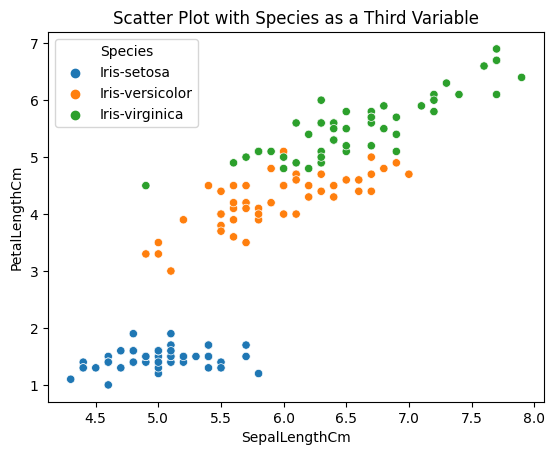

In [ ]:
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=df)
plt.title('Scatter Plot with Species as a Third Variable')
plt.show()

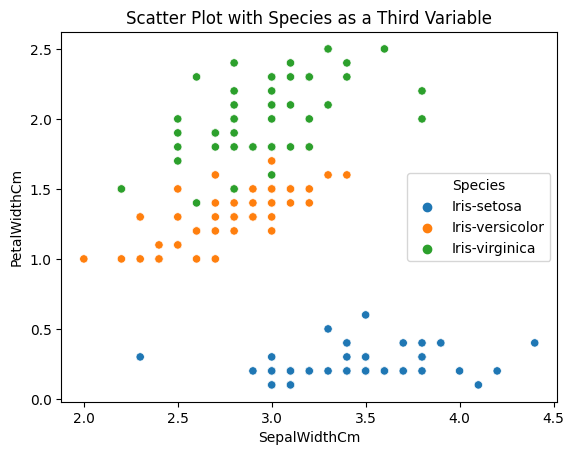

In [ ]:
sns.scatterplot(x='SepalWidthCm', y='PetalWidthCm', hue='Species', data=df)
plt.title('Scatter Plot with Species as a Third Variable')
plt.show()

In the relationship between sepal and petal measurements, it is evident that the width as well as length serves as a distinct determinant. Both the clusters based on width  as well as length , have a more pronounced impact on the species patterns in the dataset .


## **V)CORRELATION MATRIX**

To determine the strength of relationship or to say how strongly variables are related , so that we can identify the independent variables .


<ipython-input-61-f1278ec55735>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


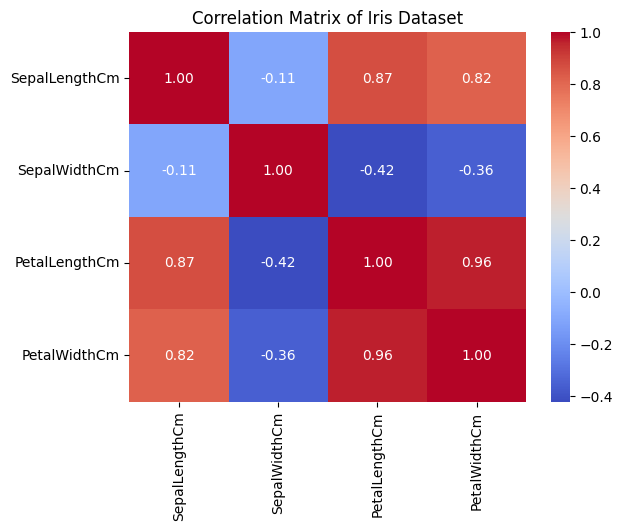

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Iris Dataset')
plt.show()

We see that sepallength and petallength has more strong relationship than the sepalwidth and petalwidth , but sepal length is also related with petalwidth . We also notice a stronger relationship between petalwidth and petallength and vice versa .Hence we can come to the conclusion that all the four measurements of sepal and petal are the independent variable.

# **2.DATASET TASK**

### Split the dataset into features (X) and target variable (y) after identifying the dependnet and indeendnet variables .

In [ ]:
X = df.drop('Species', axis=1)
y = df['Species']

## Spliting the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Choosing a classification model for the speices classification

we can choose various classfication model and choose the one which provides us a better accuracy in predictions .

1.Logistic Regression

2.Decison Tree Classification

#1) **LOGISTIC REGRESSION**

THe reason to choose this model , is that it is a simple, interpretable, and efficient algorithm suitable for binary and multiclass classification tasks. The dataset's moderate size make logistic regression a good starting point and a baseline model.


## TRAINING THE MODEL

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## EVALUVATION OF THE MODEL ON TEST DATASET / PREDICTIONS OF THE TRAINED MODEL

In [ ]:
predictions = model.predict(X_test)
predictions

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

## MODEL EVALUVATION (BASED ON METRICS):

Utilize metrics such as accuracy, precision, recall ,confusion matrix ,... for model evaluation along with the class report metric

In [ ]:
accuracy = accuracy_score(y_test,predictions)
precision = precision_score(y_test,predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

In [ ]:
print(f'Model Evaluation Metrics:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Model Evaluation Metrics:
Accuracy: 0.93
Precision: 0.93
Recall: 0.93

Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



# **DECISION TREE CLASSIFIER MODEL:**

THe reason to choose this model :

They are interpretable, handle non-linear relationships well, require no feature scaling, naturally support multiclass classification, and are robust to outliers in the dataset.

There is no clear linearity between iris - versicolor and iris-virginica as we can't draw a line between them clearly based on sepallength and petallength  scatterplot ,and such scatterplots ....


### **TRAINING THE MODEL**

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

### **EVALUVATION OF THE MODEL ON TEST DATASET/PREDICTIONS OF THE TRAINED MODEL**

In [ ]:
predictions = model.predict(X_test)
predictions

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

## **MODEL EVALUVATION (BASED ON METRICS)**:

Utilize metrics such as accuracy, precision, recall ,confusion matrix ,... for model evaluation along with the class report metric

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f'Model Evaluation Metrics:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Model Evaluation Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Confusion Matrix:
[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**OBSERVATIONS** :

Decision Tree Accuracy      : Highest accuracy observed(1.00), indicating better performance along with highest precison,f1 and recall.

Logistic Regression Accuracy: Although the accuracy is still High (0.9333), it seems comparatively lower than the decision tree , the same with recal ,f1 and precison .

**CONCLUSION**:

Given that the decision tree model not only has higher accuracy but also better precision and recall scores compared to logistic regression, the conclusion is that the decision tree model is performing superiorly on the Iris classification task. This suggests that the decision tree is a more effective model for this specific dataset, capturing the underlying patterns and making better predictions for the given classes.